In [ ]:
!pip install flashtext

  Preparing metadata (setup.py) ... done
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9296 sha256=65ea4aa937cb49a15a12b6559ffcb40219f7bbfdabb9b66bcc0549469b665040
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [ ]:
import pandas as pd
from flashtext import KeywordProcessor

In [ ]:
# Carga de dados
df = pd.read_csv("/content/Feeds_Com_Label.csv")
df['Concatenacao'] = df['Title'] + df['Content']

df

,ID,Title,Content,label,Concatenacao
0,11,"Há mais de 10 anos, dupla de cães 🐶 acompanha ...",A forte ligação dos cães com o ser humano desp...,animais,"Há mais de 10 anos, dupla de cães 🐶 acompanha ..."
1,12,Muros da gentileza ajudam desabrigados e famíl...,Os chamados muros da gentileza estão promovend...,solidariedade,Muros da gentileza ajudam desabrigados e famíl...
2,9,20 fotos maravilhosas mostrando a alegria de t...,Alguns de nós sabem a sorte que é ter um irmão...,proposito,20 fotos maravilhosas mostrando a alegria de t...
3,6,13 razões pelas quais crianças são bem mais es...,Temos muito o que aprender com elas.,familia,13 razões pelas quais crianças são bem mais es...
4,1,Ex-executiva fala sobre vida sem propósito - I...,Esqueça o que te disseram sobre a zona de conf...,familia,Ex-executiva fala sobre vida sem propósito - I...
...,...,...,...,...,...
1087,1700,Jeanette Epps: Conheça a 1a astronauta negra e...,Seis meses no espaço. Esse é o tempo que fará ...,ciencia,Jeanette Epps: Conheça a 1a astronauta negra e...
1088,1699,Brasileira transforma redes de pesca descartad...,Um esfregão para limpezas pesadas e saquinhos ...,diversidade,Brasileira transforma redes de pesca descartad...
1089,1701,Chadwick Boseman transformou as vidas de crian...,"Jackson Duarte, 7 anos, foi assistir Pantera N...",familia,Chadwick Boseman transformou as vidas de crian...
1090,1690,Casa Azul de Frida Kahlo ‘abre as portas’ para...,"Localizada no bairro de Colonia del Carmen, na...",diversidade,Casa Azul de Frida Kahlo ‘abre as portas’ para...


In [ ]:
#Pré-processamento de texto
kp = KeywordProcessor()
stopwords_ninjas = ['de', 'que', 'da', 'o', 'e']
nltk.download('stopwords')
stopwords_nltk = list(stopwords.words('portuguese'))
stopwords_ninjas.extend(stopwords_nltk)
for i in stopwords_ninjas:
    kp.add_keyword(i, ' ')

df['Texto_tratado'] = df.Concatenacao.apply(kp.replace_keywords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Content,label,Concatenacao,Texto_tratado
0,11,"Há mais de 10 anos, dupla de cães 🐶 acompanha ...",A forte ligação dos cães com o ser humano desp...,animais,"Há mais de 10 anos, dupla de cães 🐶 acompanha ...","10 anos, dupla cães 🐶 acompanha caminh..."
1,12,Muros da gentileza ajudam desabrigados e famíl...,Os chamados muros da gentileza estão promovend...,solidariedade,Muros da gentileza ajudam desabrigados e famíl...,Muros gentileza ajudam desabrigados famíli...
2,9,20 fotos maravilhosas mostrando a alegria de t...,Alguns de nós sabem a sorte que é ter um irmão...,proposito,20 fotos maravilhosas mostrando a alegria de t...,20 fotos maravilhosas mostrando alegria te...
3,6,13 razões pelas quais crianças são bem mais es...,Temos muito o que aprender com elas.,familia,13 razões pelas quais crianças são bem mais es...,13 razões quais crianç bem espertas ...
4,1,Ex-executiva fala sobre vida sem propósito - I...,Esqueça o que te disseram sobre a zona de conf...,familia,Ex-executiva fala sobre vida sem propósito - I...,Ex-executiva fala sobre vida propósito - IBC...
...,...,...,...,...,...,...
1087,1700,Jeanette Epps: Conheça a 1a astronauta negra e...,Seis meses no espaço. Esse é o tempo que fará ...,ciencia,Jeanette Epps: Conheça a 1a astronauta negra e...,Jeanette Epps: Conheç 1a astronauta negra ...
1088,1699,Brasileira transforma redes de pesca descartad...,Um esfregão para limpezas pesadas e saquinhos ...,diversidade,Brasileira transforma redes de pesca descartad...,Brasileira transforma redes pesca descartada...
1089,1701,Chadwick Boseman transformou as vidas de crian...,"Jackson Duarte, 7 anos, foi assistir Pantera N...",familia,Chadwick Boseman transformou as vidas de crian...,Chadwick Boseman transformou vidas crianç ...
1090,1690,Casa Azul de Frida Kahlo ‘abre as portas’ para...,"Localizada no bairro de Colonia del Carmen, na...",diversidade,Casa Azul de Frida Kahlo ‘abre as portas’ para...,Casa Azul Frida Kahlo ‘abre portas’ visi...


In [ ]:
df.label.value_counts()

label
ecologia            155
proposito           132
solidariedade       125
cultura              88
animais              86
educacao             85
diversidade          80
familia              72
etnias               67
celebracao           60
empreendedorismo     47
esporte              36
ciencia              35
saude                24
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [ ]:
# Aplicar o SMOTEsmote = SMOTE(random_state=42) X_res, y_res = smote.fit_resample(X, y)

In [ ]:
#Data leveler (reamostragem)
df_amostra = pd.DataFrame()
maximo = df.label.value_counts().max()
for label in df.label.unique():
    df_amostra = pd.concat([df_amostra, df[df.label == label].sample(maximo, random_state=42, replace = True)])
df = df_amostra
df.label.value_counts()

label
animais             155
solidariedade       155
proposito           155
familia             155
diversidade         155
empreendedorismo    155
educacao            155
etnias              155
saude               155
ecologia            155
ciencia             155
celebracao          155
esporte             155
cultura             155
Name: count, dtype: int64

In [ ]:
#Vetorização do texto / bag of words
tfdf = TfidfVectorizer(ngram_range=(1, 3), max_df=0.8, min_df=0.03)
x = tfdf.fit_transform(df.Texto_tratado)
x

<2170x199 sparse matrix of type '<class 'numpy.float64'>'
	with 23136 stored elements in Compressed Sparse Row format>

In [ ]:
#Treinamento do modelo
xtrain, xtest, ytrain, ytest = train_test_split(x, df.label, test_size=0.3, random_state=42)
rfc = RandomForestClassifier(random_state = 42)
model = rfc.fit(xtrain, ytrain)

In [ ]:
#Teste do modelo
pred = model.predict(xtest)
predAll = model.predict(x)
print(classification_report(ytest, pred))

                  precision    recall  f1-score   support

         animais       0.85      0.85      0.85        40
      celebracao       0.81      0.70      0.75        50
         ciencia       0.94      0.92      0.93        53
         cultura       0.89      0.95      0.92        44
     diversidade       0.80      0.97      0.88        37
        ecologia       0.83      0.84      0.84        45
        educacao       0.95      1.00      0.97        36
empreendedorismo       0.95      0.84      0.89        44
         esporte       0.92      1.00      0.96        48
          etnias       0.88      0.84      0.86        44
         familia       0.83      0.85      0.84        52
       proposito       0.96      0.83      0.89        58
           saude       0.91      1.00      0.95        49
   solidariedade       0.76      0.75      0.75        51

        accuracy                           0.88       651
       macro avg       0.88      0.88      0.88       651
    weighted

accuracy title = 0.32
accuracy Content = 0.42
accuracy Concatenacao = 0.47
accuracy stopwords = 0.52
accuracy data leveler = 0.91

In [ ]:
print(confusion_matrix(ytest, pred))

[[13  1  0  2  1  2  0  0  0  0  2  0  0  3]
 [ 1  4  0  1  3  5  1  1  0  0  1  0  0  4]
 [ 0  1  0  0  1  5  2  0  0  0  1  0  0  0]
 [ 1  2  0  9  1  2  5  2  0  3  0  1  0  2]
 [ 1  1  0  5  2  4  1  0  0  2  2  0  0  8]
 [ 1  0  0  7  0 28  2  1  0  0  1  0  0  4]
 [ 1  2  1  2  0  3 10  0  0  0  2  0  0  3]
 [ 0  0  1  2  0  3  1  1  0  0  1  0  0  5]
 [ 0  0  0  1  1  1  1  0  3  0  1  0  0  0]
 [ 1  0  0  3  0  1  1  1  1  7  0  0  0  4]
 [ 0  0  0  2  0  1  2  1  0  0  7  1  0  5]
 [ 1  1  1  1  0  2  0  1  1  1  1 26  0  5]
 [ 0  1  0  1  0  0  0  1  0  0  0  0  1  3]
 [ 2  0  0  3  1 10  2  1  0  2  0  1  0 21]]


In [ ]:
#Matriz de confusão
fig = px.imshow(confusion_matrix(ytest, pred), x=model.classes_, y=model.classes_)
fig.show()

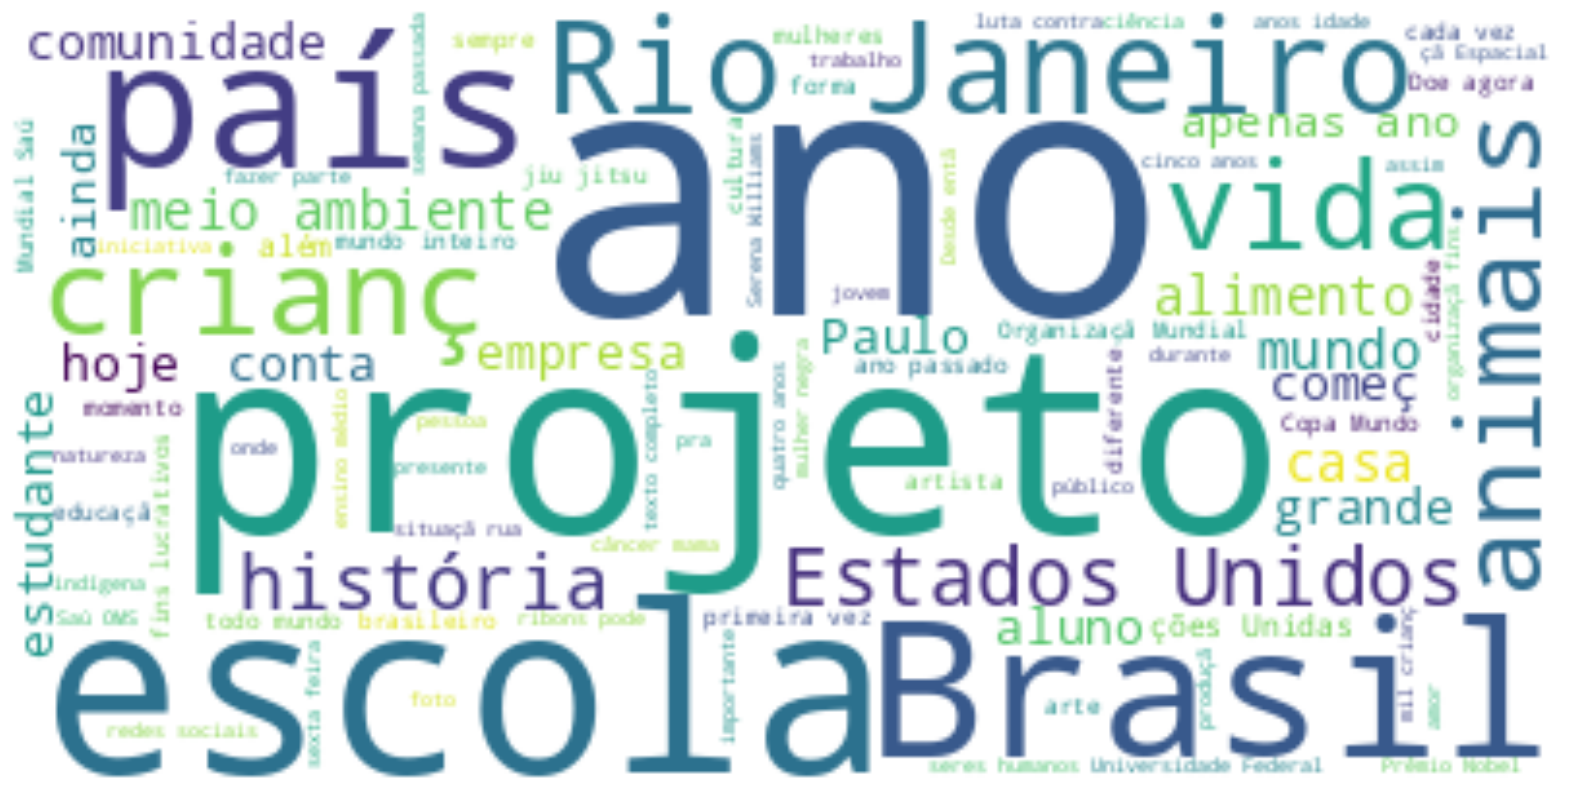

In [ ]:
#Nuvem de palavras (EDA de texto)
wordcloud = WordCloud(background_color='white').generate(df.Texto_tratado.str.cat(sep=' '))
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Teste com a base inteira
x = tfdf.transform(df.Texto_tratado)
df['Predicao'] = model.predict(x)
df['Proba'] = model.predict_proba(x).max(axis=1)
df['Resultado'] = df.Predicao == df.label

In [ ]:
model.predict_proba(x)[0]

array([0.884, 0.01 , 0.01 , 0.02 , 0.01 , 0.   , 0.   , 0.   , 0.   ,
       0.01 , 0.02 , 0.006, 0.   , 0.03 ])

In [ ]:
px.histogram(df, x='Proba', color='Resultado')

In [ ]:
#definição de thresh hold
ponto_de_corte = 0.6
df[df.Proba > ponto_de_corte].Resultado.value_counts()

Resultado
True     781
False      4
Name: count, dtype: int64

In [ ]:
#Calculo de taxa de automação
df[df.Proba > ponto_de_corte].Resultado.size / df.shape[0]

0.7188644688644689

In [ ]:
#Taxa de concordância
df[df.Proba > ponto_de_corte].Resultado.value_counts()[0] / df[df.Proba > ponto_de_corte].Resultado.size

0.9949044585987261